In [74]:
from math import log
import numpy as np
import copy
import decisionTreePlot as dtPlot

In [75]:
class DecisionTree():
    def calcShannonEnt(self, dataSet):
        numEntries = len(dataSet)
        labelCounts = {}
        for featVec in dataSet:
            currentLabel = featVec[-1]
            labelCounts[currentLabel] = labelCounts.get(currentLabel, 0) + 1
        
        shannonEnt = 0.0
        for key in labelCounts:
            prob = float(labelCounts[key]) / numEntries
            shannonEnt -= prob * log(prob, 2)
        return shannonEnt
    
    def splitDataSet(self, dataSet, index, value):
        """
        index为选定的feature号
        value为在该feature下给定的值
        本function的作用为：
        根据选定feature的值对dataset进行分组，feature value值相同的为同一组。
        并且分组后的subDataSet中不包含选定的feature。
        用于计算根据某feature分组后的信息熵。
        """
        retDataSet = []
        for featVec in dataSet:
            if featVec[index] == value:
                reducedFeatVec = featVec[:index]
                reducedFeatVec.extend(featVec[index+1:]) # 一定要注意，在split时需要把分割的column去掉
                retDataSet.append(reducedFeatVec)
        return retDataSet
    
    def chooseBestFeatureSplit(self, dataSet):
        numFeatures = len(dataSet[0]) - 1
        baseEntropy = self.calcShannonEnt(dataSet)
        bestInfoGain, BestFeature = 0.0, -1
        for i in range(numFeatures):
            featList = [example[i] for example in dataSet] # the all the value in one feature(column)
            uniqueVals = set(featList) # get the unique values in this feature
            newEntropy = 0.0
            for value in uniqueVals:
                subDataSet = self.splitDataSet(dataSet, i, value) # get the subDataSet with giving value
                prob = len(subDataSet) / len(dataSet) # 这是在该feature下的值等于给定value值的概率
                newEntropy += prob * self.calcShannonEnt(subDataSet) # calculate the subDataSet's ShannonEnt.
            infoGain = baseEntropy - newEntropy
            print ("i = ", i, "infoGain = ", infoGain)
            if (infoGain > bestInfoGain):
                bestInfoGain = infoGain
                BestFeature = i
            print ("Best Feature is ", BestFeature)
        return BestFeature
    
    def majorityCnt(self, classList):
        classCount = {}
        for vote in classlist:
            if vote not in classCount.keys():
                classCount[vote] = 0
            classCount[vote] += 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) # sort dict type
        return sortedClassCount[0][0] # return the most common class in label column
        
    
    def createTree(self, dataSet, columnNameList):
        """
        The whole route map:
        1. define the end conditions for recursion.
        2. find the best feature from the original dataset
        3. generate the unique value list of best feature.
        4. split the original dataset into several subdataset according to 
        the different values in the best feature.
        5. for every subdataset, repeat the step 1 to step 4 untill the 
        subdataset reach the end conditions.
        6. use a dictionary to store the tree structure.
        """    
        
        """End condition 1: all labels have the same value (only 1 class)"""
        classList = [example[-1] for example in dataSet]
        # list.count(value): count the frequence of value occurred in this list
        if classList.count(classList[0]) == len(classList):
            return classList[0]
        
        """
        End condition 2: after using all features to split the dataset, the rest
        dataset's labels still contain multiple classes.
        """
        if len(dataSet[0]) == 1: # the rest only contains the single column (label)
            return majorityCnt(classList)
        
        bestFeat = self.chooseBestFeatureSplit(dataSet) # get the index of best feature
        bestFeatName = columnNameList[bestFeat]
        
        myTree = {bestFeatName:{}}
        del(columnNameList[bestFeat]) # delete the best feature name in the column name list
        
        featVals = [example[bestFeat] for example in dataSet]
        UniqueVals = set(featVals)
        
        for value in UniqueVals:
            subColumnNameList = columnNameList[:] # why we need this line?
            """
            use recursion to generate branches for each subdataset.
            Usually, createTree will return a dict-type object unless the subdataset reach the end condition.
            """
            
            # input: dict1 = {"layer 1": {"layer 2": 2}}
            #        print (dict1["layer 1"]["layer 2"])
            # output: 2
            myTree[bestFeatName][value] = self.createTree(self.splitDataSet(dataSet, bestFeat, value), subColumnNameList)
        
        return myTree
    
    def classify(self, inputTree, featNameList, testVec):
        """
        决策树的本质为根据一个多层的dict type对一个向量进行分组。
        决策树节点的上下顺序根据信息增益来排列。
        In general, the depth of decision tree is usually greater than 2 (一个根节点和至少一层子节点)
        """
        
        # get the root node's key and value
        FirstKey = list(inputTree.keys())[0]
        secondDict = inputTree(FirstKey)
        
        # get the root feature value of test data
        featIndex = featNameList.index(FirstKey)
        testFeatVal = testVec[featIndex] # the feature value of test data
        
        res = secondDict[testFeatVal] # 根据第一个特征的值分组的结果
        
        """
        首先根据根节点的特征进行分组，分组后如果对应的value仍为dict，说明下方还有子节点，需要进一步进行分组，采用递归进行下一次分组。
        如果value不为dict type仅为一个值，说明分组已经完成，下方无子节点。
        """
        if isinstance(res, dict):
            className = classify(res, featNameList, testVec)
        else:
            className = res
        return classnName
                

i =  0 infoGain =  0.03939650364612124
Best Feature is  0
i =  1 infoGain =  0.039510835423565815
Best Feature is  1
i =  2 infoGain =  0.37700523001147723
Best Feature is  2
i =  3 infoGain =  0.5487949406953986
Best Feature is  3
i =  0 infoGain =  0.22125183600446618
Best Feature is  0
i =  1 infoGain =  0.09543725231055489
Best Feature is  0
i =  2 infoGain =  0.7704260414863776
Best Feature is  2
i =  0 infoGain =  0.2516291673878229
Best Feature is  0
i =  1 infoGain =  0.4591479170272448
Best Feature is  1
i =  0 infoGain =  0.9182958340544896
Best Feature is  0
i =  0 infoGain =  0.3166890883150208
Best Feature is  0
i =  1 infoGain =  0.19087450462110933
Best Feature is  0
i =  0 infoGain =  1.0
Best Feature is  0


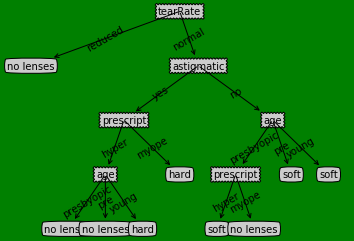

In [76]:
with open(r"..\data\machinelearninginaction\Ch03\lenses.txt", "r") as fr: #使用相对路径打开文件，使用with as打开文件
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesColumnNameList = ['age', 'prescript', 'astigmatic', 'tearRate']
DT = DecisionTree()
lensesTree = DT.createTree(lenses, copy.deepcopy(lensesColumnNameList))
dtPlot.createPlot(lensesTree)